# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Step 2: Read and Explore Dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel("C:/Users/gailt/bhaktivscode/Customer Churn/ecommercedataset.xlsx")

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [6]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
df.shape

(5630, 20)

There are 20 columns in the dataset.

In [8]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [9]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

There are fields like Tenure, WarehouseToHouse, HoursSpendonApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount and DaySinceLastOrder have nulls in them. 

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

In [11]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

The number of rows in the dataset is 5630 and the customer ID field has the same number of unique rows which means that this it the unique key in the dataset.
We can drop this column from the dataset.

# Step 3: Investigating each column

In [12]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [13]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

The column CustomerID has been dropped.

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

In [16]:
df.head()

,churn,tenure,preferredlogindevice,citytier,warehousetohome,preferredpaymentmode,gender,hourspendonapp,numberofdeviceregistered,preferedordercat,satisfactionscore,maritalstatus,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


#### Changing all the column names to lowercase

In [17]:
df.dtypes

churn                            int64
tenure                         float64
preferredlogindevice            object
citytier                         int64
warehousetohome                float64
preferredpaymentmode            object
gender                          object
hourspendonapp                 float64
numberofdeviceregistered         int64
preferedordercat                object
satisfactionscore                int64
maritalstatus                   object
numberofaddress                  int64
complain                         int64
orderamounthikefromlastyear    float64
couponused                     float64
ordercount                     float64
daysincelastorder              float64
cashbackamount                 float64
dtype: object

In [18]:
df.churn.nunique()

2

There are just 2 values for the churn field.

In [19]:
df.churn.unique()

array([1, 0])

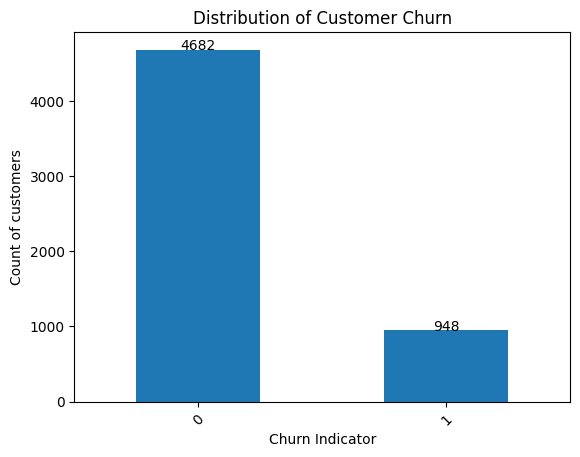

In [20]:
value_count = df.churn.value_counts()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha = 'center')
plt.xlabel('Churn Indicator')
plt.ylabel('Count of customers')
plt.title('Distribution of Customer Churn')
plt.xticks(rotation=45)
plt.show()

In [21]:
df.churn.value_counts(normalize=True)

churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

There are 2 values for Churn. there are no nulls for this column. This is a variable which indicates whether the customer has vhurned or not. A value of 1 means that the customer has churned and a value of 0 means still a customer.
The dataset is highly imbalanced the number of customers leaving are way less. In the dataset there are just 16.8% of the customers that churn.

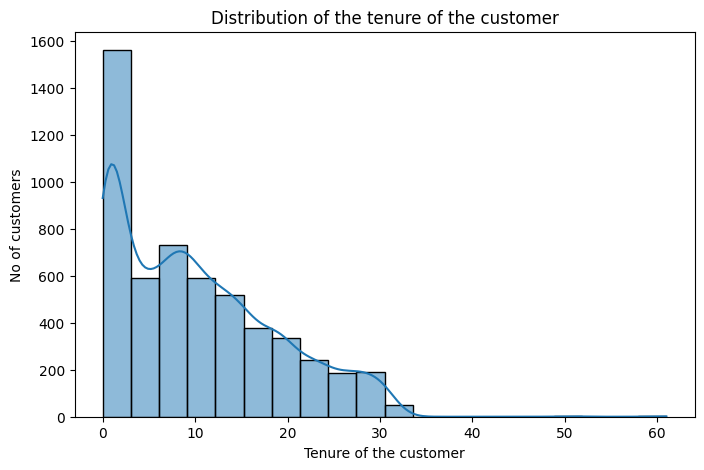

In [22]:
data = df.tenure
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=20)
plt.xlabel('Tenure of the customer')
plt.ylabel('No of customers')
plt.title("Distribution of the tenure of the customer")
plt.show()

 The strong peak at the beginning and the rapid decline suggest a high rate of customer churn or attrition in the early stages of their relationship with the business.  While the number of long-tenured customers is small, they represent a valuable segment that has remained loyal to the business.

In [23]:
df.preferredlogindevice.unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

There are just 3 values to this column Mobile Phone, Phone and Computer. Looks like there is some issue with the values as Mobile Phone and Phone are the same. We should change it to just Mobile and Web.

In [24]:
df.preferredlogindevice = df.preferredlogindevice.replace({'Mobile Phone': 'Mobile',
                                 'Phone': 'Mobile',
                                 'Computer': 'Web'})

In [25]:
df.preferredlogindevice.unique()

array(['Mobile', 'Web'], dtype=object)

In [26]:
value_count = df.preferredlogindevice.value_counts()

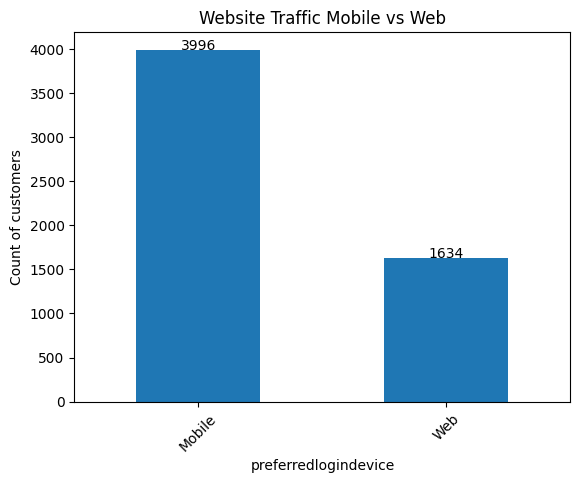

In [27]:
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha = 'center')
plt.ylabel('Count of customers')
plt.title('Website Traffic Mobile vs Web')
plt.xticks(rotation=45)
plt.show()

There is lot of traffic from the Mobile devices

This should be a category column.

In [28]:
value_count = df.citytier.value_counts().sort_index()

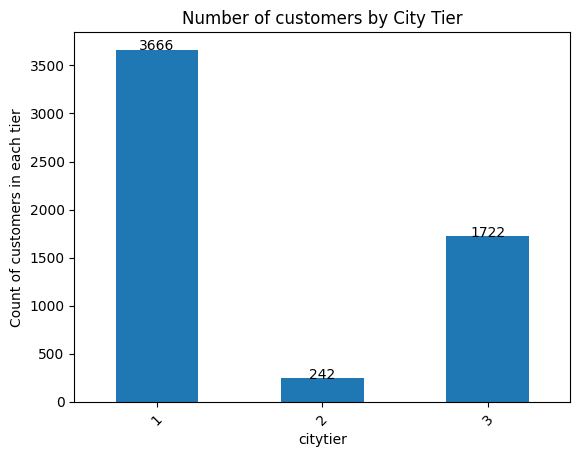

In [29]:
ax = value_count.plot(kind = "bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.ylabel('Count of customers in each tier')
plt.title('Number of customers by City Tier')
plt.xticks(rotation=45)
plt.show()

There is a lot of traffic from Tier1 cities and then from Tier 3 and Tier 2 cities in that order.
This should be a category field.

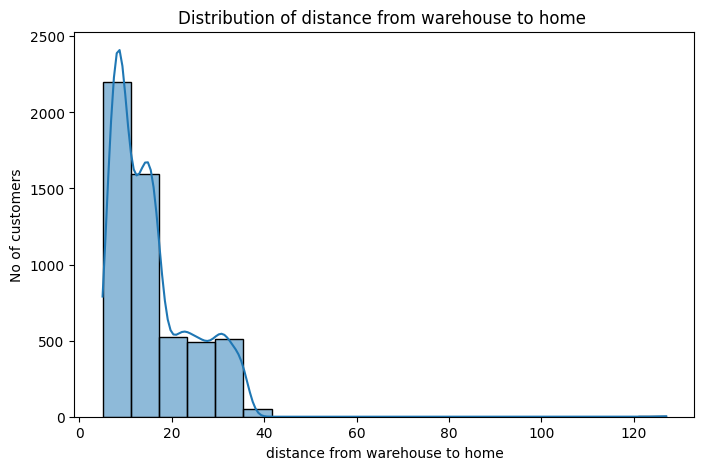

In [30]:
data = df.warehousetohome
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=20)
plt.xlabel('distance from warehouse to home')
plt.ylabel('No of customers')
plt.title("Distribution of distance from warehouse to home ")
plt.show()

The strong peak at the beginning indicates that the warehouse is strategically located to serve a large number of customers who live nearby. The presence of customers at longer distances suggests that there might be potential to expand delivery services or open additional warehouses to reach these customers more effectively.

In [31]:
df.preferredpaymentmode = df.preferredpaymentmode.replace({'Debit Card': 'Debit Card',
                                 'Credit Card': 'Credit Card',
                                 'CC': 'Credit Card',
                                 'E Wallet': 'E Wallet',
                                 'UPI': 'UPI',
                                 'COD': 'Cash on Delivery',
                                 'Cash on Delivery': 'Cash on Delivery'
                                 })

In [32]:
value_count = df.preferredpaymentmode.value_counts()

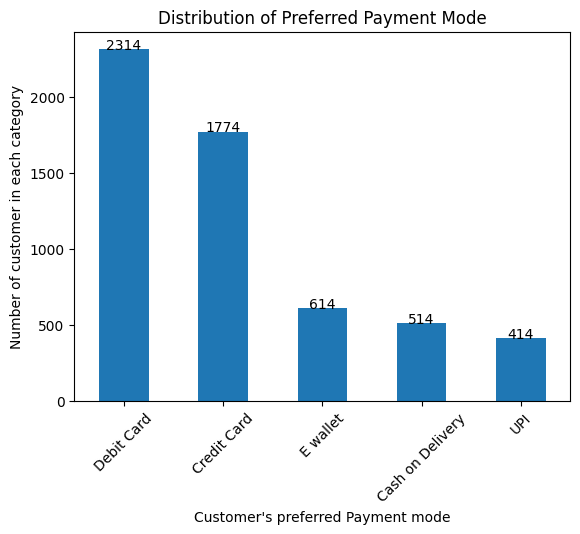

In [33]:
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Customer's preferred Payment mode")
plt.ylabel("Number of customer in each category") 
plt.xticks(rotation=45)
plt.title("Distribution of Preferred Payment Mode")          
plt.show()

Most of the customers have Debit card as the preferred payment mode followed by Credit Cards and E wallet in that order.

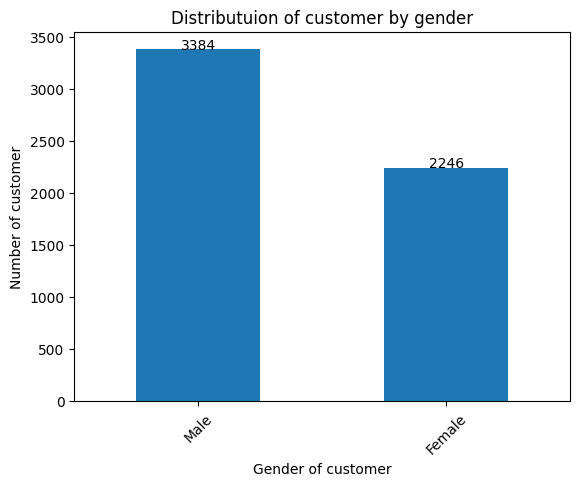

In [34]:
value_count = df.gender.value_counts()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha= "center")
plt.xlabel("Gender of customer")
plt.ylabel("Number of customer")
plt.title("Distributuion of customer by gender")
plt.xticks(rotation=45)
plt.show()


The maximum number of the customer are Male. This variable should be a category variable.

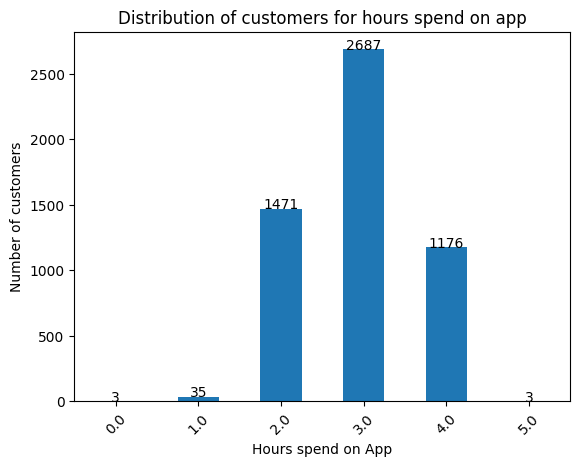

In [35]:
value_count = df.hourspendonapp.value_counts().sort_index()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Hours spend on App")
plt.ylabel("Number of customers")
plt.title("Distribution of customers for hours spend on app")
plt.xticks(rotation=45)
plt.show()

Maximum number of customer spend 3hrs on the app.
The field should also be a category variable.

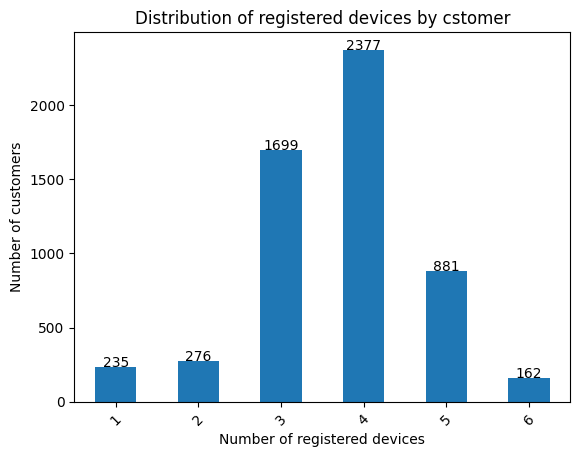

In [36]:
value_count = df.numberofdeviceregistered.value_counts().sort_index()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Number of registered devices")
plt.ylabel("Number of customers")
plt.title("Distribution of registered devices by cstomer")
plt.xticks(rotation=45)
plt.show()

Customers have upto 6 registered devices. And customers with 4 devices registered is the highest.

This variable should also be a category variable.

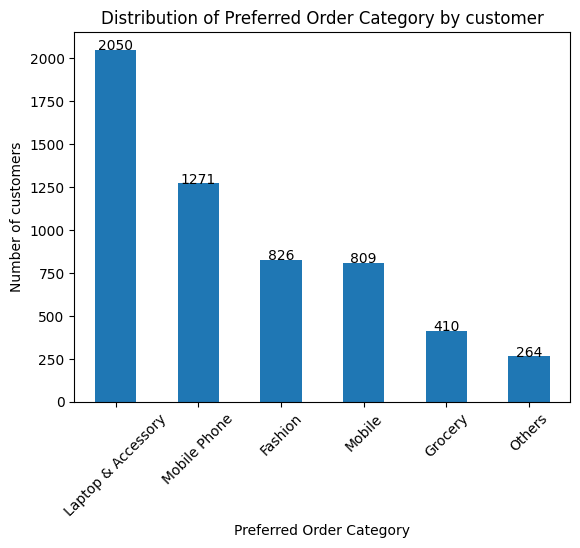

In [37]:
value_count = df.preferedordercat.value_counts()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Preferred Order Category")
plt.ylabel("Number of customers")
plt.title("Distribution of Preferred Order Category by customer")
plt.xticks(rotation=45)
plt.show()

Maximum number of customer have Laptop and Accessory as their Preferred Order Category and then followed by Mobile Phones
This variable should be categorical.

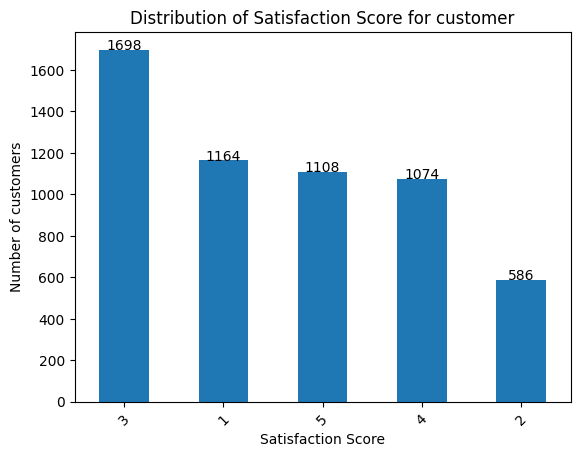

In [38]:
value_count = df.satisfactionscore.value_counts()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Satisfaction Score")
plt.ylabel("Number of customers")
plt.title("Distribution of Satisfaction Score for customer")
plt.xticks(rotation=45)
plt.show()

The distribution is not uniform. The most common satisfaction score is "3." This indicates that a significant portion of customers are in the middle range of satisfaction.
The counts for scores "1" and "2" are relatively high, suggesting a considerable number of customers are dissatisfied. This warrants further investigation into the reasons for their dissatisfaction.
This variable can be conerted into category.

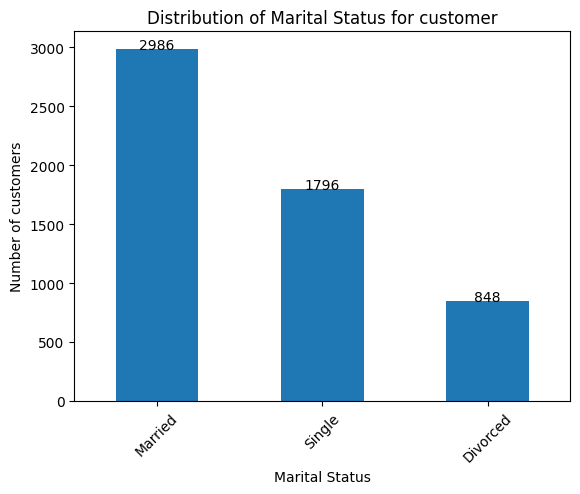

In [39]:
value_count = df.maritalstatus.value_counts()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Marital Status")
plt.ylabel("Number of customers")
plt.title("Distribution of Marital Status for customer")
plt.xticks(rotation=45)
plt.show()

Married customers are the most prevalent group. This variable can be conerted into category.

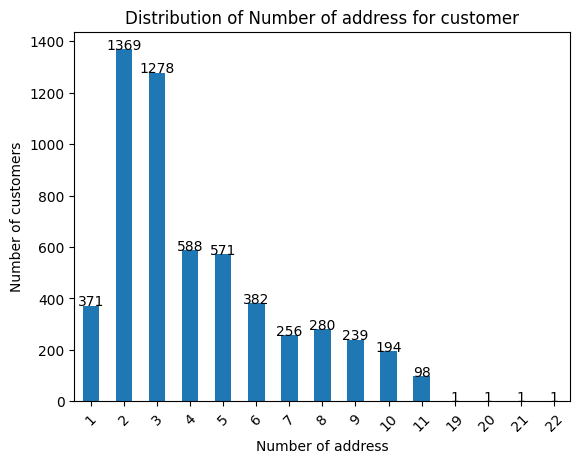

In [40]:
value_count = df.numberofaddress.value_counts().sort_index()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Number of address")
plt.ylabel("Number of customers")
plt.title("Distribution of Number of address for customer")
plt.xticks(rotation=45)
plt.show()

The distribution is heavily right-skewed. Most customers have a relatively small number of addresses (2-6), while a few customers have a significantly higher number.
The categories "2" and "3" addresses have the highest customer counts, indicating that most customers have either 2 or 3 addresses. This could be due to factors such as primary residence, work address, or a few frequently used delivery addresses.
The distribution has a long tail, extending to customers with 10, 11, 19, 20, 21, and 22 addresses. The counts for these higher address numbers are very low.
The values at the far right of the graph (19, 20, 21, 22 addresses) could be considered potential outliers, indicating unusual customer behavior or possible data entry

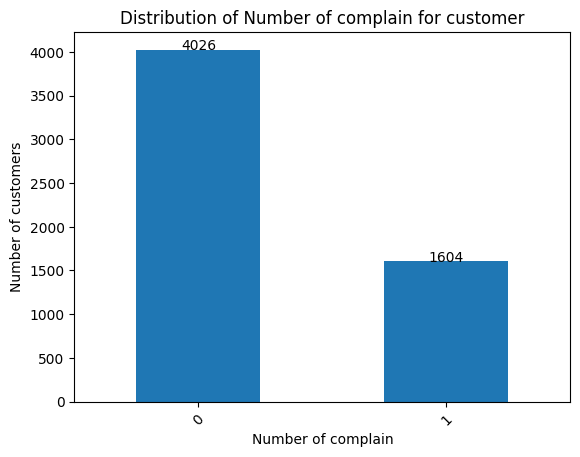

In [41]:
value_count = df.complain.value_counts()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("Number of complain")
plt.ylabel("Number of customers")
plt.title("Distribution of Number of complain for customer")
plt.xticks(rotation=45)
plt.show()

The graph provides a high-level view of the complaint rate among customers. The fact that 1604 customers have filed at least one complaint suggests that there are issues that need to be addressed.
Can be conveted into a category.

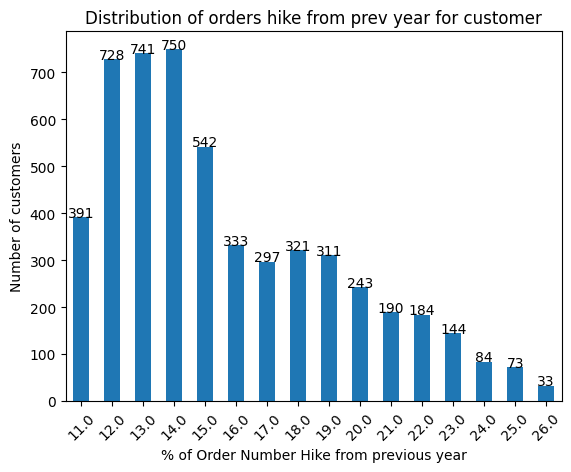

In [42]:
value_count = df.orderamounthikefromlastyear.value_counts().sort_index()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("% of Order Number Hike from previous year")
plt.ylabel("Number of customers")
plt.title("Distribution of orders hike from prev year for customer")
plt.xticks(rotation=45)
plt.show()

The data suggests that most customers experience relatively modest increases in orders from the previous year.
Can be an integer kind variable.

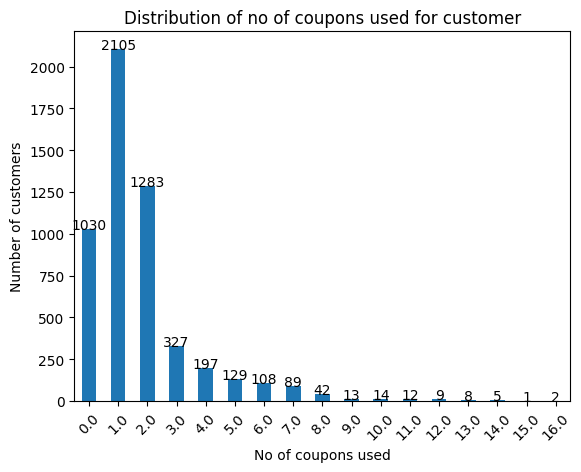

In [43]:
value_count = df.couponused.value_counts().sort_index()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("No of coupons used")
plt.ylabel("Number of customers")
plt.title("Distribution of no of coupons used for customer")
plt.xticks(rotation=45)
plt.show()

The distribution is heavily right-skewed. Most customers use a very small number of coupons, while a few customers use a significantly higher number.
Can be an integer

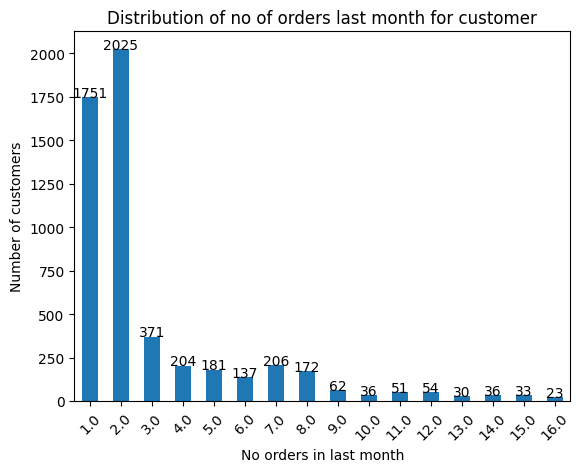

In [44]:
value_count = df.ordercount.value_counts().sort_index()
ax = value_count.plot(kind="bar")
for i, v in enumerate(value_count):
    plt.text(i, v+0.2, str(v), ha="center")
plt.xlabel("No orders in last month")
plt.ylabel("Number of customers")
plt.title("Distribution of no of orders last month for customer")
plt.xticks(rotation=45)
plt.show()

 The data suggests that most customers tend to place only a few orders per month. This could be due to factors such as product type, customer needs, or purchase frequency.
 Can be an integer variable.

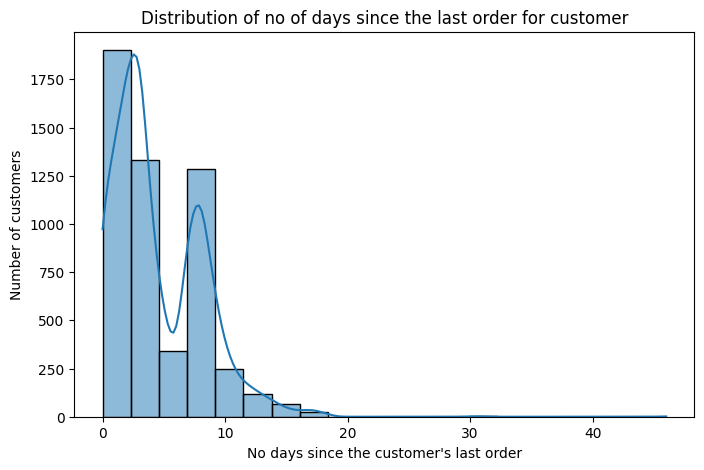

In [45]:
data = df.daysincelastorder
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=20)
plt.xlabel("No days since the customer's last order")
plt.ylabel("Number of customers")
plt.title("Distribution of no of days since the last order for customer")
plt.show()

The bimodal distribution indicates the presence of two distinct customer groups: those who order very frequently and those who order with a longer, but still relatively consistent, interval.

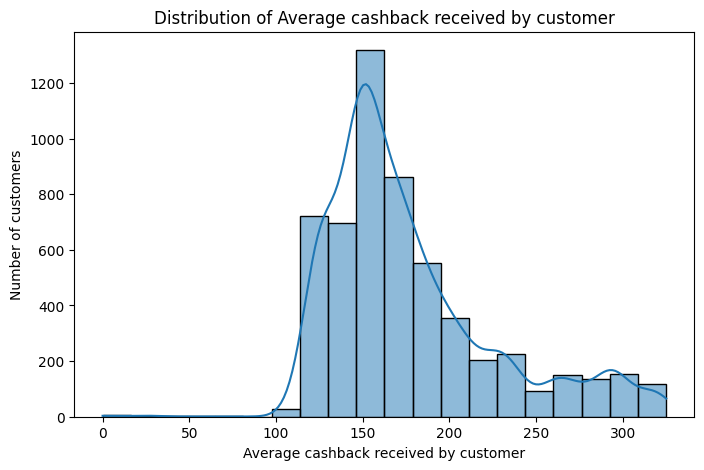

In [46]:
plt.figure(figsize=(8,5))
data = df.cashbackamount
sns.histplot(data, kde=True, bins=20)
plt.xlabel("Average cashback received by customer")
plt.ylabel("Number of customers")
plt.title("Distribution of Average cashback received by customer")
plt.show()

The dominant peak is centered around 150-175 in average cashback, indicating that a significant portion of customers receive cashback in this range. There's a secondary, smaller peak around 275-300, suggesting another group of customers who receive higher average cashback. There are very few customers who receive cashback below 100.

# Step 4: Plot Churn Distribution for each category variable

### Converting columns into category

In [47]:
cat_cols = ["preferredlogindevice",
"citytier",
"preferredpaymentmode",
"gender",
"hourspendonapp",
"numberofdeviceregistered",
"preferedordercat",
"satisfactionscore",
"maritalstatus",
"numberofaddress",
"complain"]

In [48]:
df[cat_cols] = df[cat_cols].astype('category')

In [49]:
print(df.dtypes)

churn                             int64
tenure                          float64
preferredlogindevice           category
citytier                       category
warehousetohome                 float64
preferredpaymentmode           category
gender                         category
hourspendonapp                 category
numberofdeviceregistered       category
preferedordercat               category
satisfactionscore              category
maritalstatus                  category
numberofaddress                category
complain                       category
orderamounthikefromlastyear     float64
couponused                      float64
ordercount                      float64
daysincelastorder               float64
cashbackamount                  float64
dtype: object


### Analyzing the categorical columns with chrun

In [50]:
print(cat_cols)

['preferredlogindevice', 'citytier', 'preferredpaymentmode', 'gender', 'hourspendonapp', 'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore', 'maritalstatus', 'numberofaddress', 'complain']


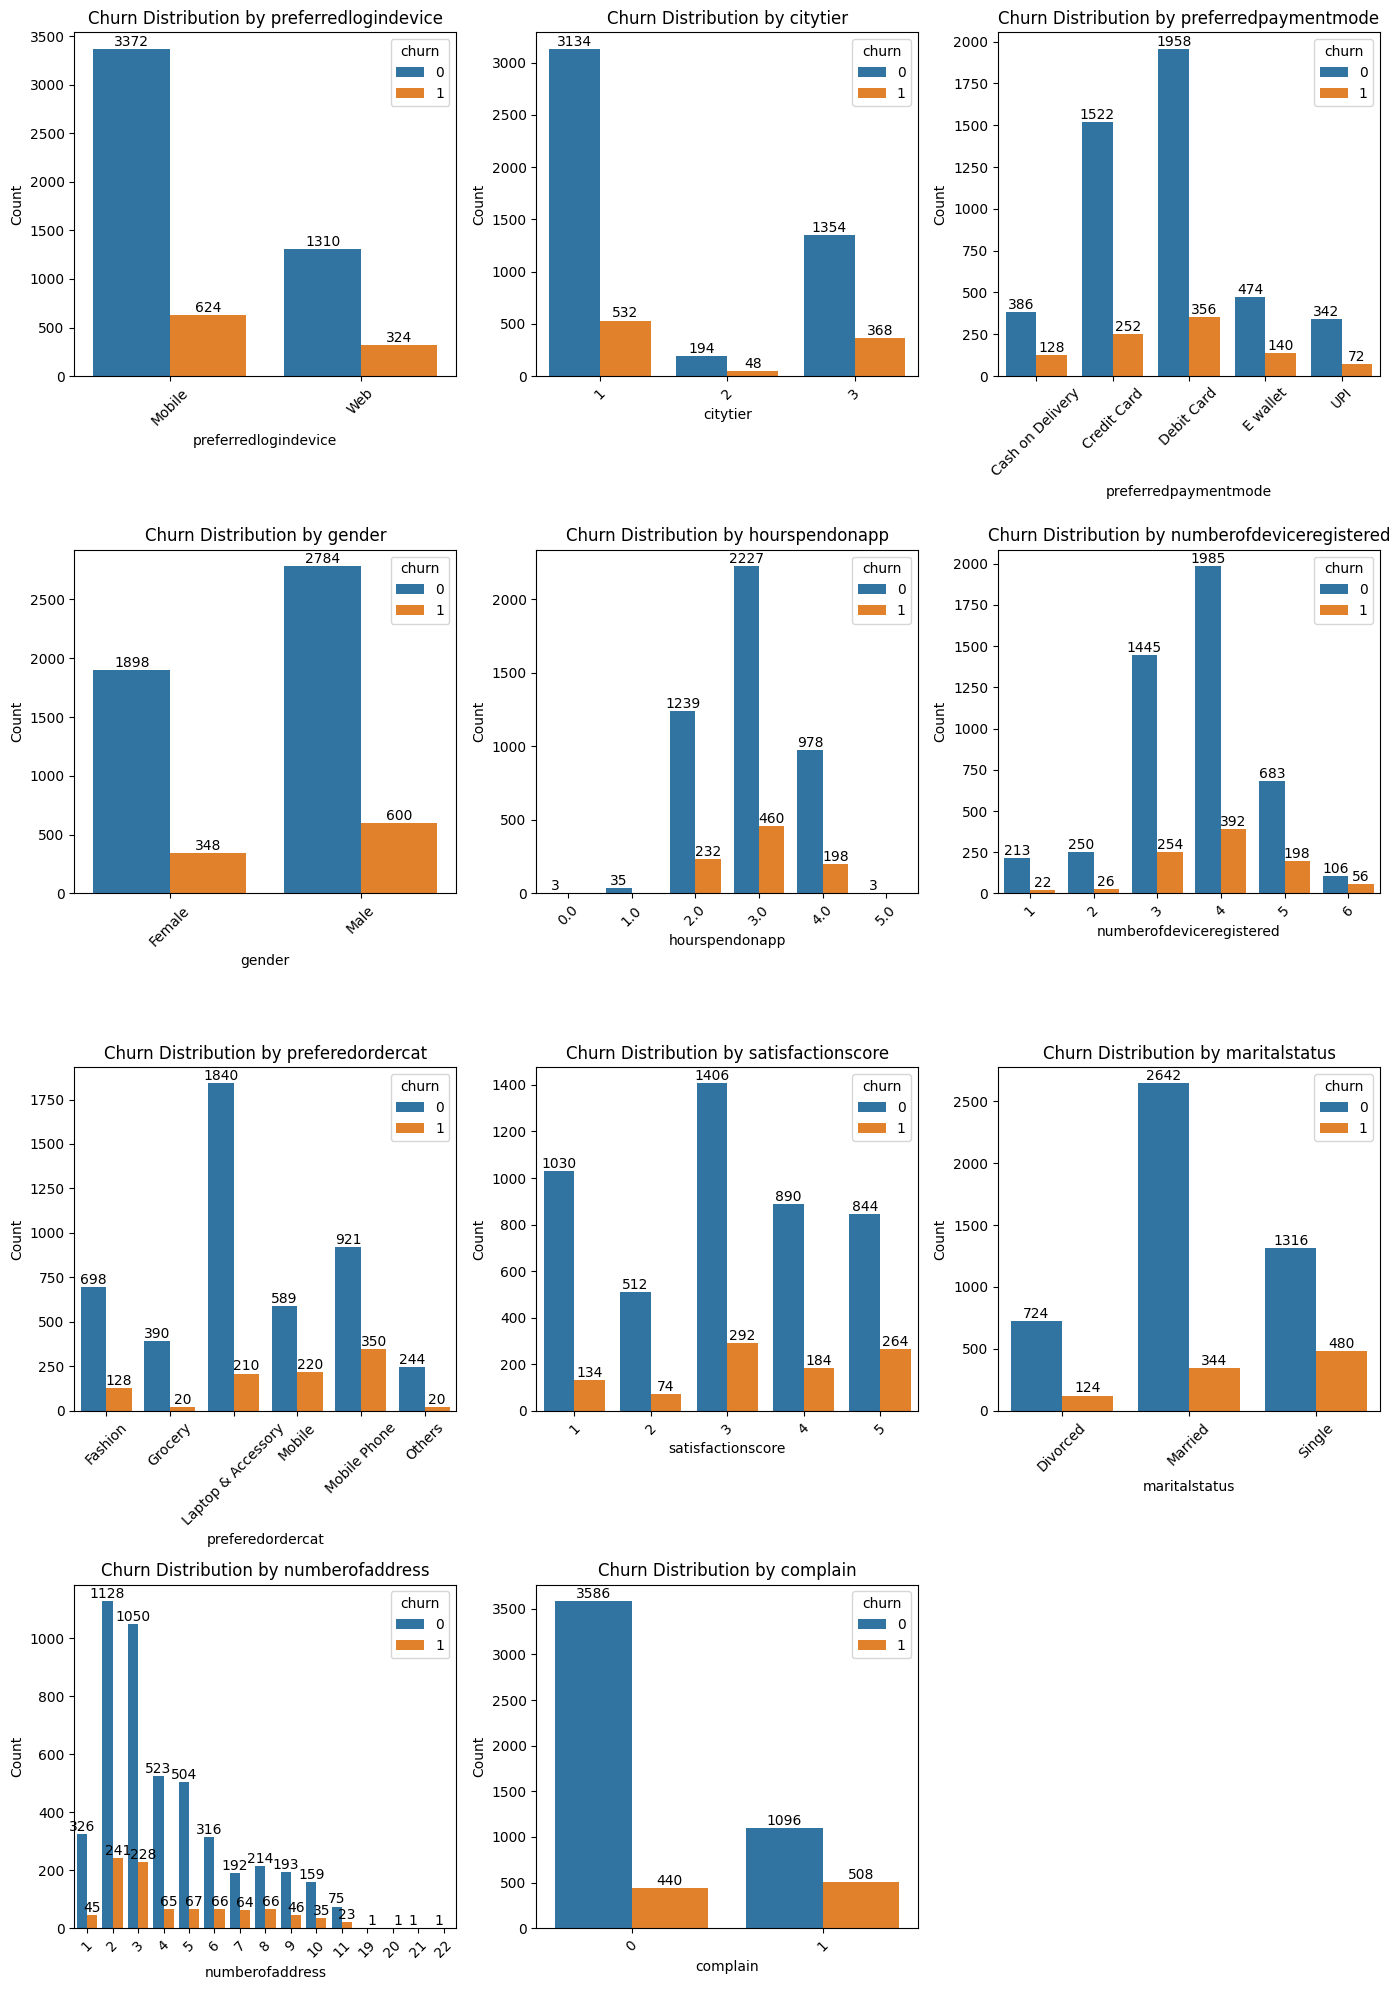

In [51]:
ncols = 3
nrows = math.ceil(len(cat_cols)/ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(14,5*nrows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    ax = sns.countplot(data=df, x=col, hue="churn", ax=axes[i] )
    axes[i].set_title(f"Churn Distribution by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        height = p.get_height()  # Get the height of each bar
        if height > 0:  # Only add text for bars with non-zero height
            width = p.get_width()  # Get the width of each bar
            x = p.get_x() + width / 2  # Get the x-position of the center of the bar
            y = height + 0.1  # Position the text slightly above the bar

            # Display the value at the center of each bar
            ax.text(x, y, f'{height:.0f}', ha='center', va='bottom', fontsize=10)
  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplot spaces
plt.tight_layout()
plt.show()



#### PreferredLoginDevice

Significantly higher number of customers use Mobile vs Web. The churn rate is higher for Web than for Mobile.

Analysis and Insights
1. Mobile Focus: Customers use the mobile platform the most. Prioritize the mobile app development and user interface.
2. Platform Optimization: The web platform might have usability issues or lack of features which are present in the mobile app, leading to higher customer churn.
3. Targeted Retention: Conduct surveys with the web users to find out the pain areas and develop specific retention strategies for web users addressing their pain points.

Potential Ideas:
1. Conduct audit of the web platform.
2. Feature analysis differences in the mobile app and web.
3. Create a trgeted marketing campaign for web users.

In [61]:
contingency_table = pd.crosstab(df['preferredlogindevice'], df['churn'])

# Compute Cramér's V
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0506


0.0506 is very close to 0, suggesting that there is practically no significant relationship between the preferred login device and churn.
In practical terms, this means that the preferred login device (whether mobile or web) has a negligible impact on whether a customer churns or not.

#### City Tier
City Tier 1 has the most number of customers. It is odd that there are too few customers in Tier 2 but more customers in Tier 3. But as per the current data the highest churn rate is in tier 3. Customer Churn decreases as the Tier increases.

Analysis and Insight
1. Socio-economic factors: City tier represent different socio-economic groups with varying level of disposable income, spending habits and access to technology. 
2. Infrastructure: Lower tier city might have limited internet connectivity impacting customer experience and leading to higher churn in higher Tiers.
3. Customer Needs: Customer needs abd expectations might be different between the Tier customers. 

Potential Ideas:
1. Develop localized Marketing campaign for each Tier.
2. Analyze customer demographic and behavior for each Tier.

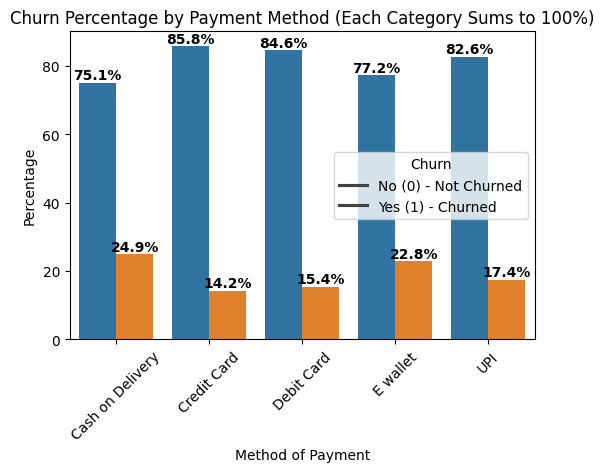

In [52]:
payment_counts = df.groupby(['preferredpaymentmode', 'churn']).size().unstack()
payment_percentages = payment_counts.div(payment_counts.sum(axis=1), axis=0) * 100
#print(payment_percentages)

df_percent = payment_percentages.reset_index().melt(id_vars="preferredpaymentmode", var_name="churn", value_name="Percentage")
#print(df_percent)
plt.figure(figsize=(6, 4))

ax = sns.barplot(data=df_percent, x="preferredpaymentmode", y="Percentage", hue="churn")

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid showing labels on bars with height 0
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', 
                ha='center', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel("Method of Payment")
plt.ylabel("Percentage")
plt.title("Churn Percentage by Payment Method (Each Category Sums to 100%)")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No (0) - Not Churned", "Yes (1) - Churned"])
plt.show()


#### Preferred Payment Mode
Cash on Delivery (COD) has the highest churn rate (24.9%) among all payment methods. E Wallets (22.8%) and UPI (17.4%) also have relatively high churn rates.Credit Card (14.2%) and Debir Card (15.4%) has the lowest churn rates, indicating more loyal customers

Analysis and Insights:
1. Debit Card has the highest number of customers both churned and not churned.
2. The Churn rate varies significantely varies significantly across payment modes.
3. Customers using E Wallet are more likely to Churn.

Potential Ideas:
1. Offer discounts for prepaid orders to encourage a shift towards digital payment.
2. Surveys can be run for customers for COD methods and E Wallets to identify potential problems.
3. Provide reward points to increase repeat purchases.
4. Conduct deeper analysis into why e-wallet users have a high churn rate.
5. Segment customers based on their preferred payment mode and churn status.

In [53]:
gender_counts = df.groupby(['gender', 'churn']).size().unstack()
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100


df_gender = gender_percentages.reset_index().melt(id_vars="gender", var_name="churn", value_name="Percentage")
df_gender

,gender,churn,Percentage
0,Female,0,84.505788
1,Male,0,82.269504
2,Female,1,15.494212
3,Male,1,17.730496


#### Gender
There are significantly more male customers than female customers. While males have a higher overall number of customers, they also have a higher absolute number of churned customers. The percentage of churned customers is slightly higher among males compared to females.

Analysis and Insights:
1. Gender Impact: Gender appears to be a factor influencing customer churn.
2. Potential for Targeted Strategies: The difference in churn between genders suggests the need for tailored strategies to address the specific needs of each group.

Potential Ideas:
1. Analyze customer feedback, transaction history, or other relevant data to identify potential causes (e.g., product preferences, service issues, communication styles) to understand why males have a higher churn rate.
2. Segment Customers based on gender to analyze their characteristics and behavior.

In [54]:
counts = df.groupby(['hourspendonapp', 'churn']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


df_percent = percentages.reset_index().melt(id_vars="hourspendonapp", var_name="churn", value_name="Percentage")
df_percent

,hourspendonapp,churn,Percentage
0,0.0,0,100.000000
1,1.0,0,100.000000
2,2.0,0,84.228416
3,3.0,0,82.880536
4,4.0,0,83.163265
5,5.0,0,100.000000
6,0.0,1,0.000000
7,1.0,1,0.000000
8,2.0,1,15.771584
9,3.0,1,17.119464


In [62]:
contingency_table = pd.crosstab(df['hourspendonapp'], df['churn'])

# Compute Cramér's V
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0410


#### Hours Spend On App
The highest count of non-churned customers is at 3 hours spent on the app. The number of churned customers increases as the hours spent on the app increase, peaking at 3 hours. The counts are very low for both churned and non-churned customers at the extreme ends (0.0, 1.0, and 5.0 hours). The churn rate is higher at 3 and 4 hours compared to the other categories.

Analysis and Insights:
1. App Engagement and Churn: The graph suggests a relationship between app engagement (measured by hours spent) and churn. However, it's not a simple linear relationship.
2. Potential Sweet Spot: There appears to be a "sweet spot" of around 3 hours where the highest number of customers are engaged (non-churned).
3. High Churn at Mid-Range: The relatively high proportion of churn at 3 and 4 hours indicates a potential issue at this engagement level.
4. Low Engagement Impact: Very low engagement (0 and 1 hours) also leads to low numbers of customers, suggesting a lack of adoption.
5. High Engagement Impact: Very high engagement (5 hours) leads to a low number of customers, suggesting that go back to the data team and understand is this hours a weekly number or monthly or daily. assuming if it is monthly number maybe take data for the other months and see if the pattern is similasr. Or maybe there is entry problem in the data.

Potential Ideas:
1. Analyze app usage patterns, customer feedback, or other relevant data to identify potential causes (e.g., specific features, usability issues, content relevance).
2. Identify distinct customer segments and analyze their characteristics and behavior.


In [55]:
counts = df.groupby(['numberofdeviceregistered', 'churn']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


df_percent = percentages.reset_index().melt(id_vars="numberofdeviceregistered", var_name="churn", value_name="Percentage")
df_percent

,numberofdeviceregistered,churn,Percentage
0,1,0,90.638298
1,2,0,90.579710
2,3,0,85.050029
3,4,0,83.508624
4,5,0,77.525539
5,6,0,65.432099
6,1,1,9.361702
7,2,1,9.420290
8,3,1,14.949971
9,4,1,16.491376


#### Number of Devices Registered
The largest group of customers has 4 devices registered. While 4 devices have the highest count, they also show a significant number of churned customers. The customers with either 1 or 6 devices registered shows a low churn rate.

Analysis and Insight:
1. Potential Feature Gap: There could be features and functionalities that are lacking for users with multiple devices.
2. Complexity: Customers with multiple devices might be experieencing issues realted to their accounts with their devices like login issues, difficulty keeping data consistent across devices.

Potential Ideas:
1. Identify the pain points and challenges faced by users with multiple registered devices.
2. Identify and propose new features that simplify multi-device management.

#### Preferred Order Category
Laptop and Accessory is the most popular preferred order category, with a significant lead over others. Despite having the highest number of customers, it shows a relatively low number of customers churned. Mobile Phones and Fashion are the other category which is popular between the custimers. Grocery has a relatively lower churn rate.

Analysis and Insight:
1. Laptop and Accessory Success: the high customer count and relatively low churn in this category suggest strong performance in this category. It could be contributed to: high value products, brand trust, quality.
2. Mobile Phone: the high churn in this category remain a significant concern and indicates potential issues: there are a lot of products in this category could be the PDP page for this is not informative enough maybe lacking product description leading to more churn rate, competition from the other customers for this category.

Potential Ideas:
1. Analyze customer demographics, purchase patterns, reviews, and marketing strategies specific to Laptop and Accessory category.
2. Develop a comprehensive strategy to address the high churn rate in the Mobile Phone category.

#### Satisfaction Score
The highest number of customers have a satisfaction score of 3. While score 3 has the highest customer count, it also exhibits the highest number of churned customers. Generally, as the satisfaction score increases, the number of churned customers decreases there appears to be an inverse relationship. Despite having lower overall customer counts, scores 1 and 2 show relatively fewer churned customers compared to scores 3, 4, and 5. Even with a score of 5, which is the highest satisfaction score, there is still a significant number of people who churned.

Analyis and Insight:
1. Score 3 as a Critical: A score 3 might represent a neutral or indifferent sentiment. Customers at this level are potentially vulnerable to churn as they are neither highly satisfied nor dissatisfied. There might be specific issues or pain points that lead customers to rate their experience as a 3.
2. Potential for Improvement at Higher Scores: While churn decreases with higher scores, it's still present. Even highly satisfied customers might churn due to external factors or specific issues that were not captured by the satisfaction score. The fact that there is still a significant number of churn at a score of 5 indicates that satisfaction score is not the only important metric.
3. Surprising Low Churn at Low Scores: The relatively low churn at scores 1 and 2 could indicate that dissatisfied customers might be vocal about their issues, leading to resolution or targeted interventions.
Also these customers may have already expressed their negative opinions and left, so the remaining customers are those who are still willing to use the product/service, even with a low score.
4. Satisfaction Score Limitations: A single satisfaction score might not capture the complexity of customer experience. There might be other factors influencing churn that are not reflected in the score.

Potential Ideas:
1. Investigate the specific issues and pain points that lead customers to rate their experience as a 3.
2. Identify other factors that contribute to churn, even among highly satisfied customers.
3. Develop targeted interventions to improve customer retention at score 3.
4. Enhance the feedback loop to capture more detailed and actionable insights from customers.


In [56]:
counts = df.groupby(['maritalstatus', 'churn']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


df_percent = percentages.reset_index().melt(id_vars="maritalstatus", var_name="churn", value_name="Percentage")
df_percent

,maritalstatus,churn,Percentage
0,Divorced,0,85.377358
1,Married,0,88.479571
2,Single,0,73.273942
3,Divorced,1,14.622642
4,Married,1,11.520429
5,Single,1,26.726058


#### Marital Status
The Married category has the highest customer count, significantly more than Single or Divorced. The Single category has a moderate number of churned customers, but a higher proportion of churned customers relative to the non-churned customers compared to Married. 

Analysis and Insights:
1. The high churn among married customers suggests potential issues specific to this demographic. It could be related to family-related factors, time constraints, or specific needs that are not being met.
It could also be that since there are just more married people, there are also more married people who churn.
2. The higher proportion of churn among single customers indicates potential dissatisfaction or unmet needs. It could be related to lifestyle factors, individual preferences, or service expectations.
3. The low churn among divorced customers suggests a higher level of satisfaction or loyalty. It could be related to specific needs being met, or a higher value placed on the service.

Potential Ideas: 
1. Conduct surveys, interviews, or focus groups with married customers to understand their needs, pain points, and expectations.
2. Analyze the behavior and preferences of single customers, and design personalized offers, communication, or support.
3. Analyze the usage patterns, feedback, and demographics of divorced customers to identify key drivers of loyalty.
4. Use clustering algorithms or other segmentation techniques to identify distinct customer segments with unique needs and preferences.


#### Churn Distribution by Number of Address
The majority of customers have a low number of addresses registered (1-5). Customers with only 1 registered address have a relatively high churn rate, especially considering the overall number of customers at that point. Generally, churn decreases as the number of registered addresses increases, though there are fluctuations. The number of customers with a high number of registered addresses (10+) is very low.

Analysis and Insights:
1. Single Address Churn: Customers with only one address might be:New customers who haven't fully integrated with the service. Customers with limited needs or usage. Customers who found the service unsuitable for their primary address.
2. Multi-Address Engagement: Customers with multiple addresses might be: More engaged or frequent users. Using the service for different locations (e.g., home, work, vacation). More invested in the service, leading to higher retention.

Potential Ideas:
1. Analyze the behavior of single-address users compared to multi-address users (e.g., usage frequency, feature adoption, time spent on the platform). Conduct user interviews or surveys with single-address users (both churned and active) to understand their needs, expectations, and challenges.
2. Conduct interviews or surveys with highly engaged multi-address users to understand their use cases, motivations, and satisfaction levels.
3. Analyze the address management features of competitor platforms or similar services to identify best practices and potential innovations.

#### Complain
The vast majority of customers have not filed a complaint. Customers who have filed a complaint have a significantly higher churn rate compared to those who haven't. Even among customers who haven't filed a complaint, there is still a notable number of churned customers.

Analysis and Insights:
1. Complaint as a Churn Factor: Filing a complaint is a strong indicator of customer dissatisfaction and a high likelihood of churn.
2. Unreported Issues: Many customers might be experiencing issues but not filing formal complaints.
3. Complaint Resolution Effectiveness: The complaint resolution process might not be effective in retaining customers.

Potential Ideas:
1. Analyze complaint data and evaluate the effectiveness of the resolution process to reduce churn among customers who have filed complaint.
2. Analyze customer behavior and feedback to identify and address customer issues before they lead to complaints or churn.


### Analyzing numerical columns with Churn

In [57]:
float_cols = df.select_dtypes(include='float64').columns.tolist()

In [58]:
print(float_cols)

['tenure', 'warehousetohome', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount']


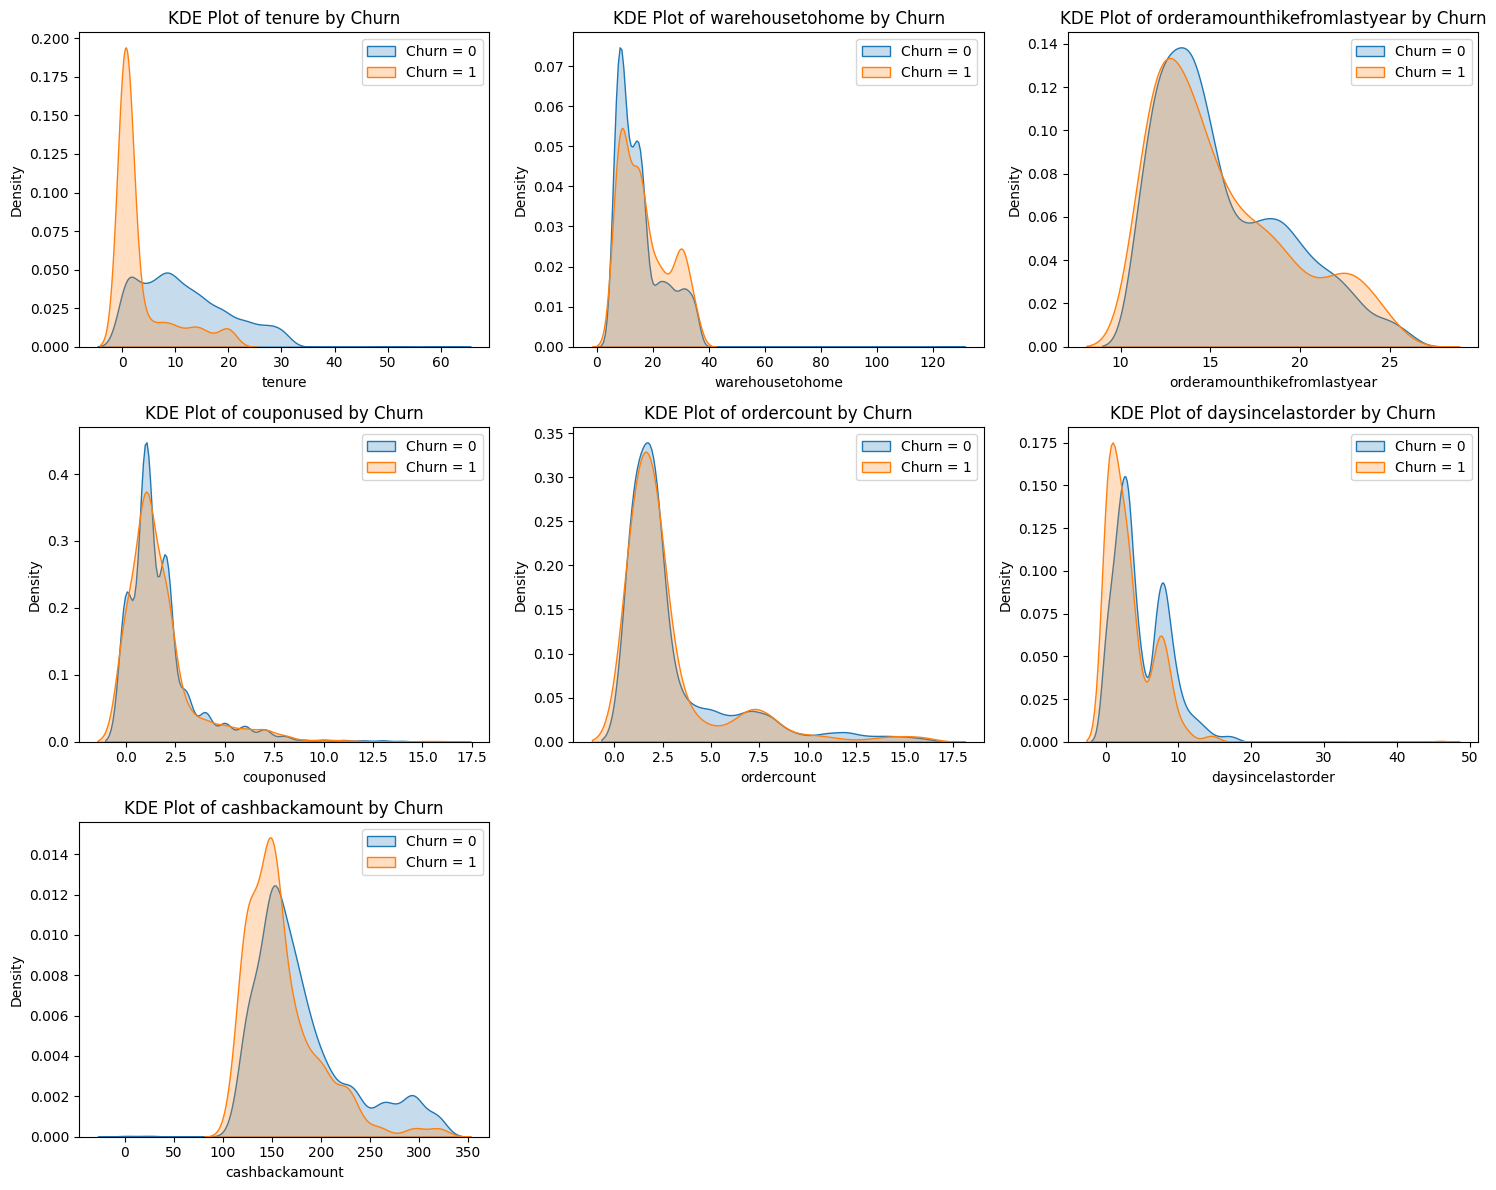

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns for 7 features
axes = axes.flatten()

# Generate KDE plots for each numerical variable
for i, col in enumerate(float_cols):
    sns.kdeplot(df[df['churn'] == 0][col], label="Churn = 0", shade=True, ax=axes[i])
    sns.kdeplot(df[df['churn'] == 1][col], label="Churn = 1", shade=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col} by Churn")
    axes[i].legend()

# Remove extra empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Tenure
For customers who did not churn, is skewed right indicating a concentration of customers with shorter tenure. 
For customers who churned, there is a higher density at shorter tenure.

Customers with shorter tenures are more likely to churn.

#### Warehouse to Home distance
For customers who did not churn, skewed right indicating a concentration of customers closer to the warehouse.
For customers who did churn, there is a slightly higher density at longer distance.

Customers living farther from the warehouse are more likely to churn.

Analysis and Insights:
1. High Churn at Low Tenure: there might be issues during the initial onboarding or early stages of customer experience.
2. Low Churn at Higher Tenure: the density of churned customers decreases significantly as tenure increases, implying that longer-term customers are less likely to churn.
3. Early Customer Experience: The extremely high peak of churn at the very beginning of tenure is a strong indicator that something is happening at the start of the customer journey that is causing customers to leave.

Potential Ideas:
1. Analyze the onboarding process, including communication, initial product usage, and customer support during the first few months.
2. Develop a strategy to improve customer engagement and reduce churn during the initial tenure period.
3. Segment customers based on their tenure and develop targeted retention strategies for each segment.
4. Understand the relationship between tenure and customer Lifetime Value, CLTV and develop strategies to increase customer lifetime value.


#### Order Amount Hike from Last Year

For customers who did not churned, is skewed right indicating a concentration of customers with lower order amount hikes. For customers who did churn, there is a slightly higher density at higher order amount hikes.

Customers with higher order amount hikes are more likely to churn.

Analysis and Insights:
1. Similar Distributions: The distributions for both churned and non-churned customers are very similar.
2. Slight Shift for Churn = 1: While the distributions are similar, there is a very slight shift (Churn = 1) towards the right (higher order amount hike values) compared to (Churn = 0). This suggests that customers who churned might have experienced slightly higher order amount hikes compared to those who didn't churn.

Potential Ideas:
1. Analyze customer feedback and reviews related to pricing and order amounts.
2. Analyze the feature importance to determine the relative contribution of orderamounthikefromlastyear in predicting churn


#### Coupon Used
Churn=0, Skewed right, indicatinga concentration of customers who used fewer coupons. Churn=1, similar to Churn=0, but with a slightly higher density at higher couponusage.

Customers who used more coupons are more likely to churn.

Analysis and Insights:
1. High Density at Low Coupon Usage: Both churned and non-churned customers show a high density at low coupon usage (around 0-2). This suggests that a large proportion of customers, regardless of churn status, use very few coupons.
2. Similar Distributions: coupon usage might not significantly differentiate customers who churn from those who don't.

Potential Ideas:
1. Investigate the relationship between coupon usage and churn, particularly the slightly higher churn rate among customers who use no coupons.
2. Develop a personalized coupon strategy to improve customer engagement and reduce churn.
3. Analyze the effectiveness of different coupon types and promotions in retaining customers.

#### Order Count
Churn = 0: Skewed right, indicating a concentration of customers with lower order counts. Churn = 1: Similar to Churn = 0, but with a slightly higher density at higher order counts.

Customers with higher order counts are more likely to churn.



#### Days Since Last Order

Churn = 0: Bimodal, indicating two groups of customers with different recency patterns. Churn = 1: Similar to Churn = 0, but with a slightly higher density at longer days since the last order.

Customers with longer periods since their last order are more likely to churn.

#### Cashback Amount
Churn = 0: Skewed right, indicating a concentration of customers with lower cashback amounts. Churn = 1: Similar to Churn = 0, but with a slightly higher density at higher cashback amounts.

Customers with higher cashback amounts are more likely to churn.

Analysis and Insights:
1. High Density at Moderate Cashback Amounts: Both churned and non-churned customers show a high density at moderate cashback amounts (around 100-200). This suggests that a large proportion of customers, regardless of churn status, earn cashback within this range.
2. Potential for Cashback as a Feature: While the distributions are similar, the slight shift suggests that 'cashbackamount' could be a useful feature in conjunction with other features for churn prediction.
3. Tail for Higher Cashback Amounts: Both distributions have a tail extending towards higher cashback amounts, indicating that some customers earn significantly more cashback.
4. Potential for Cashback Program Evaluation: The differences in the distributions could point towards a need to evaluate the effectiveness of the cashback program in retaining customers

Potential Ideas:
1. Investigate the relationship between cashback amounts and churn, particularly the slightly higher cashback amounts earned by customers who churn.
2. Develop a personalized cashback strategy to improve customer engagement and reduce churn.
3.  Improve the accuracy of churn prediction models by incorporating cashback amount as a feature.

#### Potential Ideas for all numercial columns

1. Explore why higher order amount hikes, coupon usage, order counts, and cashback amounts are associated with higher churn.
2. Design and analyze an A/B test to evaluate the impact of interventions on churn rates, focusing on the features identified in the KDE plots.
3. Build a machine learning model to predict churn and analyze the importance of each feature in the KDE plots.
4. Segment customers based on the features identified as important for churn prediction.